# Diabetes Classification Case Study

## Library Imports

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Pre-processing Data

In [3]:
rawData = pd.read_csv("train.csv")

modData = rawData.drop(columns = ["p_id"])
modData.columns = ["Number of Pregnancies","Glucose Concentration","Blood Pressure","Skin Fold Thickness","Insulin","BMI","Diabetes Pedigree Function","Age", "Diabetes"]
modData.head()

,Number of Pregnancies,Glucose Concentration,Blood Pressure,Skin Fold Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


<AxesSubplot:>

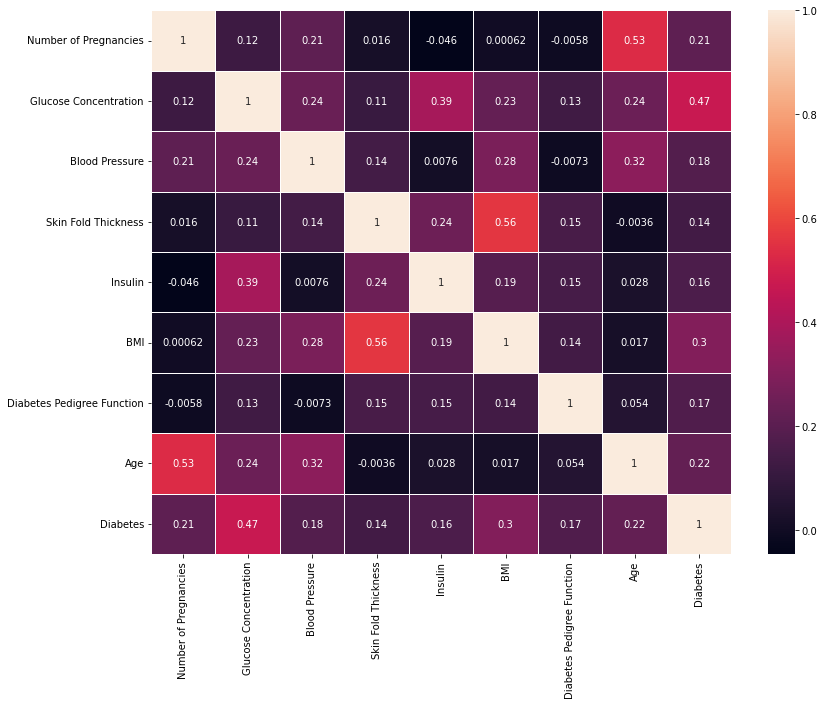

In [4]:
zeroVal = ["Blood Pressure", "Skin Fold Thickness", "Insulin", "BMI", "Diabetes Pedigree Function"]
for column in zeroVal:
    mean = int(modData[column].mean(skipna = True))
    modData[column] = modData[column].replace(0, mean)

fig, axis = plt.subplots(figsize = (13,10))
sns.heatmap(data = modData.corr(), annot = True, linewidths = 0.5)

## Splitting and Scaling Dataset

In [5]:
# 10% test, 90% train

x = modData.drop(columns = ["Diabetes"]).values
y = modData['Diabetes'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 41)

scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

## Classification Models

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

### K-Nearest Neighbours (KNN)

Accuracy Score: 74.19 %


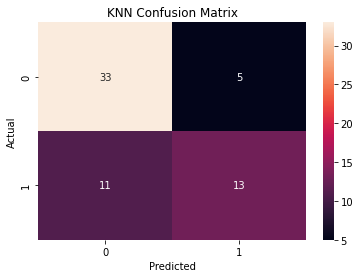

In [7]:
clf = KNeighborsClassifier(n_neighbors = 4)

clf.fit(xTrain, yTrain)
predictedTest = clf.predict(xTest)

matrix = confusion_matrix(yTest, predictedTest)
matrix = sns.heatmap(matrix, annot = True)
matrix.set_title('KNN Confusion Matrix')
matrix.set_xlabel('Predicted')
matrix.set_ylabel('Actual')

accuracy = (accuracy_score(yTest, predictedTest)) * 100
print('Accuracy Score:', round(accuracy, 2), '%')

### Neural Nets

Accuracy Score: 79.03 %


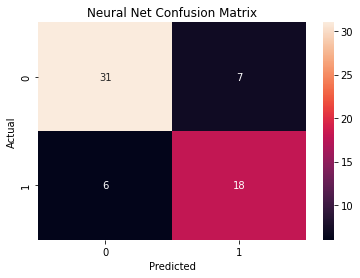

In [8]:
clf = MLPClassifier(random_state = 3, max_iter = 9000)

clf.fit(xTrain, yTrain)
predictedTest = clf.predict(xTest)

matrix = confusion_matrix(yTest, predictedTest)
matrix = sns.heatmap(matrix, annot = True)
matrix.set_title('Neural Net Confusion Matrix')
matrix.set_xlabel('Predicted')
matrix.set_ylabel('Actual')

accuracy = (accuracy_score(yTest, predictedTest)) * 100
print('Accuracy Score:', round(accuracy, 2), '%')

### Random Forest

Accuracy Score: 79.03 %


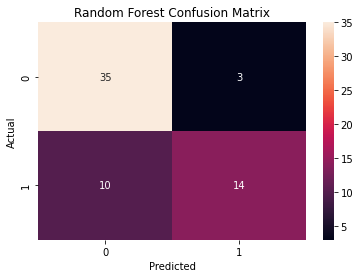

In [26]:
clf = RandomForestClassifier(random_state = 3, max_depth = 7, min_samples_split = 8)

clf.fit(xTrain, yTrain)
predictedTest = clf.predict(xTest)

matrix = confusion_matrix(yTest, predictedTest)
matrix = sns.heatmap(matrix, annot = True)
matrix.set_title('Random Forest Confusion Matrix')
matrix.set_xlabel('Predicted')
matrix.set_ylabel('Actual')

accuracy = (accuracy_score(yTest, predictedTest)) * 100
print('Accuracy Score:', round(accuracy, 2), '%')